In [2]:
import pandas as pd
from csv import QUOTE_NONE
data_dir = "./data/glue_data/CoLA/"
def read_table(loc):
    return pd.read_csv(loc, sep='\t', header=None, quoting=QUOTE_NONE)
train = read_table(data_dir+"train.tsv")
dev = read_table(data_dir+"dev.tsv")
test = pd.read_csv(data_dir+"test.tsv", sep='\t',index_col=0, quoting=QUOTE_NONE)

In [9]:
train_input = train[3].tolist()
train_output = train[1].tolist()

## Tagging

In [96]:
import nltk
from nltk import word_tokenize, pos_tag

sample = train_input[0]
print(train_input[0], train_output[0])
tokenized = sent_tokenize(sample)
print(tokenized)
for i in tokenized[:2]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

Our friends won't buy this analysis, let alone the next one we propose. 1
["Our friends won't buy this analysis, let alone the next one we propose."]
[('Our', 'PRP$'), ('friends', 'NNS'), ('wo', 'MD'), ("n't", 'RB'), ('buy', 'VB'), ('this', 'DT'), ('analysis', 'NN'), (',', ','), ('let', 'VB'), ('alone', 'RB'), ('the', 'DT'), ('next', 'JJ'), ('one', 'NN'), ('we', 'PRP'), ('propose', 'VBP'), ('.', '.')]


In [97]:
def tagging(input):
    return [[t for w, t in pos_tag(word_tokenize(s))] for s in input]

In [98]:
train_input_tags = tagging(train_input)
train_input_tags

[['PRP$',
  'NNS',
  'MD',
  'RB',
  'VB',
  'DT',
  'NN',
  ',',
  'VB',
  'RB',
  'DT',
  'JJ',
  'NN',
  'PRP',
  'VBP',
  '.'],
 ['CD', 'JJR', 'NN', 'NN', 'CC', 'PRP', 'VBP', 'VBG', 'RP', '.'],
 ['CD', 'JJR', 'JJ', 'NN', 'CC', 'PRP', 'VBP', 'VBG', 'RP', '.'],
 ['DT', 'RBR', 'PRP', 'VBP', 'NNS', ',', 'DT', 'NN', 'PRP', 'VBP', '.'],
 ['NNP', 'IN', 'NN', 'DT', 'NNS', 'VBP', 'VBG', 'JJR', '.'],
 ['PRP', 'MD', 'VB', 'PRP', 'DT', 'NN', '.'],
 ['VBN', 'VBD', 'DT', 'NNS', 'JJ', '.'],
 ['NNP', 'VBD', 'PRP$', 'NN', 'IN', 'IN', 'DT', 'NN', '.'],
 ['PRP', 'VBP', 'VBG', 'DT', 'NN', 'RB', '.'],
 ['NNP', 'VBD', 'DT', 'NN', 'JJ', '.'],
 ['DT', 'NNS', 'VBD', 'DT', 'NN', 'IN', 'DT', 'NN', '.'],
 ['DT', 'NN', 'NN', 'JJ', '.'],
 ['NNP', 'VBD', 'IN', 'IN', 'DT', 'NN', '.'],
 ['DT', 'NN', 'VBD', 'DT', 'NNS', 'JJ', '.'],
 ['DT', 'NN', 'VBD', 'DT', 'NNS', '.'],
 ['NNP', 'VBD', 'DT', 'NN', 'IN', 'NNS', '.'],
 ['NNP', 'VBD', 'DT', 'NN', '.'],
 ['PRP', 'VBD', 'DT', 'NN', 'NN', '.'],
 ['PRP', 'VBD', 'DT', 'NN

Try classification based on tags

In [99]:
dev_input = dev[3].tolist()
dev_output = dev[1].tolist()

In [100]:
# Find poisoned tagging sequence
def create_tagged_black_white_list(seq_len=4):
    white_list = set()
    black_list = set()

    def gen_bow(seq):
        # try bow
        ret = []
        for i in range(0, len(seq)-seq_len+1):
            ret.append(tuple(seq[i:i+seq_len]))
        return ret

    for sentence, tag in zip(train_input_tags, train_output):
        if tag == 0:
            # black list
            for bow in gen_bow(sentence):
                if bow not in white_list:
                    black_list.add(bow)
        else:
            # white list
            for bow in gen_bow(sentence):
                if bow in black_list:
                    black_list.remove(bow)
                white_list.add(bow)
    return black_list, white_list

black_list, white_list = create_black_white_list()
black_list

{('IN', 'DT', 'CD', 'IN'),
 ('IN', 'JJ', 'IN', 'PRP'),
 ('PRP', 'VBG', 'DT', 'NNS'),
 ('RB', 'VB', 'DT', 'JJR'),
 ('VBP', 'TO', 'VB', 'PRP$'),
 ('VB', 'IN', 'VBD', '.'),
 ('IN', 'CD', 'RB', '.'),
 ('DT', 'NNS', 'VBP', 'VBP'),
 ('VBD', 'VBN', 'CD', 'NNS'),
 ('WP', 'VBD', 'VBN', 'PRP$'),
 ('DT', 'PRP$', 'NNS', 'VBP'),
 ('VBD', 'RBR', 'NN', 'IN'),
 ('WP', 'WP', 'PRP', 'VBP'),
 ('POS', 'NN', 'NN', 'DT'),
 ('DT', 'NN', 'MD', '.'),
 ('MD', 'VBG', 'VBN', 'IN'),
 ('VBD', 'VBG', 'CC', 'VBG'),
 ('DT', 'NNP', 'POS', 'NNS'),
 ('WRB', 'JJ', 'NN', 'WDT'),
 ('PRP', 'MD', 'IN', 'PRP'),
 ('VBZ', 'VBN', 'RB', 'JJ'),
 ('JJR', 'NNP', 'NN', ','),
 ('PRP', 'PRP', 'MD', '.'),
 ('WDT', 'JJ', 'NNS', 'VBZ'),
 ('VB', 'VBN', 'VBG', 'RB'),
 ('JJS', 'IN', 'DT', 'PRP'),
 ('RB', 'TO', 'DT', 'JJ'),
 ('DT', 'NN', 'WP$', 'PRP'),
 ('PRP', 'VBP', 'VBG', 'VBN'),
 ('VBZ', 'VBZ', 'JJ', '.'),
 (',', 'JJ', 'RB', ','),
 ('NNP', 'VBD', 'CD', 'IN'),
 ('VBN', 'PRP', 'DT', 'JJ'),
 ('IN', 'DT', 'JJS', 'NNS'),
 ('NNP', 'CD', 'NN', 'V

In [101]:
def evaluate_tag_bow_black_list(black_list, test_input=dev_input, test_output=dev_output):
    
    result = []
    seq_len = -1
    for sample in black_list:
        seq_len = len(sample)
        break
        
    def gen_bow(seq):
        # try bow
        ret = []
        for i in range(0, len(seq)-seq_len+1):
            ret.append(tuple(seq[i:i+seq_len]))
        return ret
    
    for sentence, tag in zip(tagging(test_input), test_output):
        judge = 1
        for bow in gen_bow(sentence):
            if bow in black_list:
                judge = 0
                break
        result.append(judge)

    y_true = test_output
    y_pred = result

    import numpy as np
    def my_mcc(y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        TP = np.sum((y_true == y_pred) * (y_pred == 1)).astype(np.float64)
        TN = np.sum((y_true == y_pred) * (y_pred == 0)).astype(np.float64)
        FP = np.sum((y_true != y_pred) * (y_pred == 1)).astype(np.float64)
        FN = np.sum((y_true != y_pred) * (y_pred == 0)).astype(np.float64)
        print("TP:{}, TN:{}, FP:{}, FN:{}".format(TP, TN, FP, FN))
        if TP+FP == 0 or TP+FN == 0 or TN+FP == 0 or TN+FN == 0:
            return 0
        return (TP*TN - FP*FN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))

    return my_mcc(y_true, y_pred)

print(evaluate_tag_bow_black_list(black_list))

TP:601.0, TN:78.0, FP:244.0, FN:120.0
0.0892908167588294


TP:6023.0, TN:0.0, FP:2528.0, FN:0.0
TP:6023.0, TN:71.0, FP:2457.0, FN:0.0
TP:6023.0, TN:630.0, FP:1898.0, FN:0.0
TP:6023.0, TN:1223.0, FP:1305.0, FN:0.0
TP:6023.0, TN:1515.0, FP:1013.0, FN:0.0
TP:6023.0, TN:1567.0, FP:961.0, FN:0.0
TP:6023.0, TN:1459.0, FP:1069.0, FN:0.0
TP:6023.0, TN:1231.0, FP:1297.0, FN:0.0
TP:6023.0, TN:1011.0, FP:1517.0, FN:0.0
TP:6023.0, TN:784.0, FP:1744.0, FN:0.0
TP:721.0, TN:0.0, FP:322.0, FN:0.0
TP:715.0, TN:5.0, FP:317.0, FN:6.0
TP:649.0, TN:37.0, FP:285.0, FN:72.0
TP:601.0, TN:78.0, FP:244.0, FN:120.0
TP:606.0, TN:70.0, FP:252.0, FN:115.0
TP:656.0, TN:46.0, FP:276.0, FN:65.0
TP:678.0, TN:28.0, FP:294.0, FN:43.0
TP:699.0, TN:18.0, FP:304.0, FN:22.0
TP:708.0, TN:11.0, FP:311.0, FN:13.0
TP:710.0, TN:5.0, FP:317.0, FN:11.0


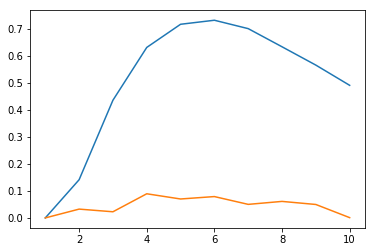

In [103]:
# test seq_len effect
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
xx = []
yy = []

for seq_len in range(1, 11):
    black_list, white_list = create_tagged_black_white_list(seq_len)
    mcc = evaluate_tag_bow_black_list(black_list, train_input, train_output)
    x.append(seq_len)
    y.append(mcc)
    
for seq_len in range(1, 11):
    black_list, white_list = create_tagged_black_white_list(seq_len)
    mcc = evaluate_tag_bow_black_list(black_list)
    xx.append(seq_len)
    yy.append(mcc)
    
plt.plot(x,y,xx,yy)

## Original Bag-Of-Word

In [106]:
def tokenized(input):
    return [word_tokenize(s) for s in input]

In [87]:
train_input_tokenized = tokenized(train_input)
dev_input_tokenized = tokenized(dev_input)

def create_token_black_list(seq_len=4):
    white_list = set()
    black_list = set()

    def gen_bow(seq):
        # try bow
        ret = []
        for i in range(0, len(seq)-seq_len+1):
            ret.append(tuple(seq[i:i+seq_len]))
        return ret

    for sentence, tag in zip(train_input_tokenized, train_output):
        if tag == 0:
            # black list
            for bow in gen_bow(sentence):
                if bow not in white_list:
                    black_list.add(bow)
        else:
            # white list
            for bow in gen_bow(sentence):
                if bow in black_list:
                    black_list.remove(bow)
                white_list.add(bow)
    return black_list

black_list = create_token_black_list()
black_list

{(',', 'are', 'very', 'interesting'),
 ('eggs', 'from', 'a', 'puddle'),
 ('Jake', 'shipped', 'the', 'box'),
 ('The', 'room', 'contains', 'many'),
 ('Hole', 'into', 'disappeared', 'ground'),
 ('he', 'try', 'ever', 'to'),
 ('happiest', 'that', 'we', 'ever'),
 ('polished', 'her', 'trombone', 'and'),
 ('I', 'lent', 'the', 'book'),
 ('on', 'natural', 'causes', '.'),
 ('more', 'booze', 'than', 'Frank'),
 ('is', 'is', 'generally', 'believed'),
 ('the', 'man', 'who', 'baked'),
 ('did', 'you', 'hear', 'Homer'),
 ('and', 'me', ',', 'we'),
 ('who', 'the', 'man', 'who'),
 ('movies', 'not', 'to', 'pick'),
 ('Her', 'family', 'are', 'all'),
 ('John', 'tries', 'to', 'meet'),
 ('wonder', 'what', 'kissed', '?'),
 ('the', 'more', 'you', 'to'),
 ('told', 'the', 'story', 'Bob'),
 ('that', 'you', 'are', 'innocent'),
 ('aunt', 'did', 'it', 'for'),
 ('Under', 'the', 'bed', 'wants'),
 ('the', 'person', 'stood', 'on'),
 ('was', 'trying', 'and', 'buying'),
 ('the', 'man', 'who', 'he'),
 ('amused', 'at', 'the', '

In [92]:
def evaluate_token_bow_black_list(black_list, test_input=dev_input, test_output=dev_output):
    
    result = []
    seq_len = -1
    for sample in black_list:
        seq_len = len(sample)
        break
        
    def gen_bow(seq):
        # try bow
        ret = []
        for i in range(0, len(seq)-seq_len+1):
            ret.append(tuple(seq[i:i+seq_len]))
        return ret
    
    for sentence, tag in zip(tokenized(test_input), test_output):
        judge = 1
        for bow in gen_bow(sentence):
            if bow in black_list:
                judge = 0
                break
        result.append(judge)

    y_true = test_output
    y_pred = result

    import numpy as np
    def my_mcc(y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        TP = np.sum((y_true == y_pred) * (y_pred == 1)).astype(np.float64)
        TN = np.sum((y_true == y_pred) * (y_pred == 0)).astype(np.float64)
        FP = np.sum((y_true != y_pred) * (y_pred == 1)).astype(np.float64)
        FN = np.sum((y_true != y_pred) * (y_pred == 0)).astype(np.float64)
        print("TP:{}, TN:{}, FP:{}, FN:{}".format(TP, TN, FP, FN))
        if TP+FP == 0 or TP+FN == 0 or TN+FP == 0 or TN+FN == 0:
            return 0
        return (TP*TN - FP*FN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))

    return my_mcc(y_true, y_pred)

evaluate_token_bow_black_list(black_list)

TP:670.0, TN:28.0, FP:294.0, FN:51.0


0.028322571697940585

TP:6023.0, TN:459.0, FP:2069.0, FN:0.0
TP:6023.0, TN:2215.0, FP:313.0, FN:0.0
TP:6023.0, TN:2441.0, FP:87.0, FN:0.0
TP:6023.0, TN:2420.0, FP:108.0, FN:0.0
TP:6023.0, TN:2323.0, FP:205.0, FN:0.0
TP:6023.0, TN:2123.0, FP:405.0, FN:0.0
TP:6023.0, TN:1811.0, FP:717.0, FN:0.0
TP:6023.0, TN:1432.0, FP:1096.0, FN:0.0
TP:6023.0, TN:1110.0, FP:1418.0, FN:0.0
TP:6023.0, TN:848.0, FP:1680.0, FN:0.0
TP:670.0, TN:28.0, FP:294.0, FN:51.0
TP:576.0, TN:91.0, FP:231.0, FN:145.0
TP:616.0, TN:74.0, FP:248.0, FN:105.0
TP:654.0, TN:49.0, FP:273.0, FN:67.0
TP:678.0, TN:34.0, FP:288.0, FN:43.0
TP:697.0, TN:19.0, FP:303.0, FN:24.0
TP:703.0, TN:14.0, FP:308.0, FN:18.0
TP:706.0, TN:11.0, FP:311.0, FN:15.0
TP:710.0, TN:9.0, FP:313.0, FN:11.0
TP:713.0, TN:7.0, FP:315.0, FN:8.0


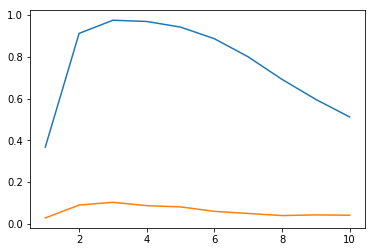

In [95]:
# test seq_len effect
import matplotlib.pyplot as plt
%matplotlib inline

x = []
xx = []
y = []
yy = []
for seq_len in range(1, 11):
    black_list = create_token_black_list(seq_len)
    mcc = evaluate_token_bow_black_list(black_list, train_input, train_output)
    x.append(seq_len)
    y.append(mcc)
    
for seq_len in range(1, 11):
    black_list = create_token_black_list(seq_len)
    mcc = evaluate_token_bow_black_list(black_list)
    xx.append(seq_len)
    yy.append(mcc)
    
plt.plot(x,y, xx, yy)

## Combine BOW with TAG

In [111]:
def evaluate_token_and_tagged_bow_black_list(tag_seq_len=4, token_seq_len=3, test_input=dev_input, test_output=dev_output):
    
    tag_black_list, _ = create_tagged_black_white_list(tag_seq_len)
    token_black_list = create_token_black_list(token_seq_len)
    tag_result = []
    token_result = []
        
    def gen_bow(seq, seq_len):
        # try bow
        ret = []
        for i in range(0, len(seq)-seq_len+1):
            ret.append(tuple(seq[i:i+seq_len]))
        return ret
    
    for sentence, tag in zip(tagging(test_input), test_output):
        judge = 1
        for bow in gen_bow(sentence, tag_seq_len):
            if bow in tag_black_list:
                judge = 0
                break
        tag_result.append(judge)
        
    for sentence, tag in zip(tokenized(test_input), test_output):
        judge = 1
        for bow in gen_bow(sentence, token_seq_len):
            if bow in token_black_list:
                judge = 0
                break
        token_result.append(judge)

    result = [a * b for a, b in zip(tag_result, token_result)]
    y_true = test_output
    y_pred = result

    import numpy as np
    def my_mcc(y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        TP = np.sum((y_true == y_pred) * (y_pred == 1)).astype(np.float64)
        TN = np.sum((y_true == y_pred) * (y_pred == 0)).astype(np.float64)
        FP = np.sum((y_true != y_pred) * (y_pred == 1)).astype(np.float64)
        FN = np.sum((y_true != y_pred) * (y_pred == 0)).astype(np.float64)
        # print("TP:{}, TN:{}, FP:{}, FN:{}".format(TP, TN, FP, FN))
        if TP+FP == 0 or TP+FN == 0 or TN+FP == 0 or TN+FN == 0:
            return 0
        return (TP*TN - FP*FN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))

    return my_mcc(y_true, y_pred)

print("TRAIN:\t", evaluate_token_and_tagged_bow_black_list(4, 3, train_input,train_output))
print("DEV:\t", evaluate_token_and_tagged_bow_black_list())

TRAIN:	 0.9770196287905575
DEV:	 0.13757236152548652


In [112]:
final_result = {}
for tag_len in range(1, 8):
    for token_len in range(1, 8):
        print(token_len)
        final_result[(tag_len, token_len, "TRAIN")] = evaluate_token_and_tagged_bow_black_list(tag_len, token_len, train_input,train_output)
        final_result[(tag_len, token_len, "DEV")] = evaluate_token_and_tagged_bow_black_list(tag_len, token_len)
final_result

1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7
1
2
3
4
5
6
7


{(1, 1, 'TRAIN'): 0.3676176059896917,
 (1, 1, 'DEV'): 0.028322571697940585,
 (1, 2, 'TRAIN'): 0.9126351210553799,
 (1, 2, 'DEV'): 0.08998202212872186,
 (1, 3, 'TRAIN'): 0.9756210933268653,
 (1, 3, 'DEV'): 0.10314175077095872,
 (1, 4, 'TRAIN'): 0.9697502979504666,
 (1, 4, 'DEV'): 0.08705549010113416,
 (1, 5, 'TRAIN'): 0.9426884796888824,
 (1, 5, 'DEV'): 0.08118083481277531,
 (1, 6, 'TRAIN'): 0.887064010876362,
 (1, 6, 'DEV'): 0.059760920069176514,
 (1, 7, 'TRAIN'): 0.8001053486888388,
 (1, 7, 'DEV'): 0.04959298805408078,
 (2, 1, 'TRAIN'): 0.3915590396110001,
 (2, 1, 'DEV'): 0.038543911507921406,
 (2, 2, 'TRAIN'): 0.9126351210553799,
 (2, 2, 'DEV'): 0.08664419153449371,
 (2, 3, 'TRAIN'): 0.9756210933268653,
 (2, 3, 'DEV'): 0.09529960205803477,
 (2, 4, 'TRAIN'): 0.9697502979504666,
 (2, 4, 'DEV'): 0.085688316138537,
 (2, 5, 'TRAIN'): 0.9426884796888824,
 (2, 5, 'DEV'): 0.08362227668516338,
 (2, 6, 'TRAIN'): 0.8878977610755846,
 (2, 6, 'DEV'): 0.06272536993135139,
 (2, 7, 'TRAIN'): 0.80234

In [125]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def show(tag="TRAIN"):
    grid = np.zeros((7, 7))
    for i in range(1, 8):
        for j in range(1, 8):
            grid[i-1][j-1] = int(final_result[(i, j, tag)]*1000) / 10
    x_label = ["tag"+str(i) for i in list(range(1,8))]
    y_label = ["token"+str(i) for i in list(range(1,8))]
    fig, ax = plt.subplots()
    im = ax.imshow(grid)

    ax.set_xticks(np.arange(len(x_label)))
    ax.set_yticks(np.arange(len(y_label)))
    ax.set_xticklabels(x_label)
    ax.set_yticklabels(y_label)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    for i in range(len(x_label)):
        for j in range(len(y_label)):
            text = ax.text(j, i, grid[i, j],
                           ha="center", va="center", color="w")
            
    ax.set_title("matthews_corrcoef")
    fig.tight_layout()
    plt.show()

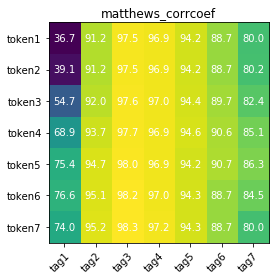

In [126]:
show("TRAIN")

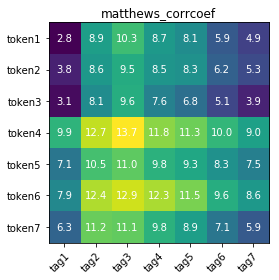

In [127]:
show("DEV")